In [1]:
import quadshit as qs
reload(qs)
import numpy as np
import matplotlib.pyplot as plt
import scipy.linalg as la
%matplotlib inline

In [2]:
D=qs.QuadShit()

In [3]:
FW,RT=D.getAndreuMats()

[ 1.  1.  1. ...,  1.  1.  1.]


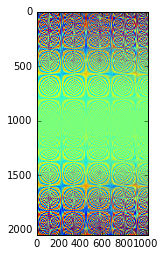

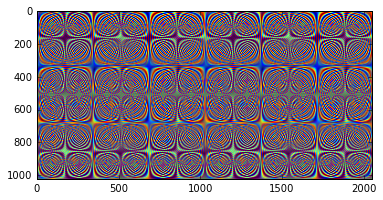

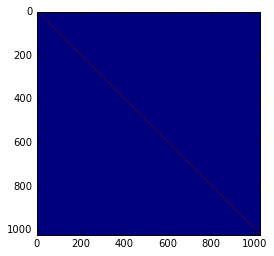

In [4]:
plt.figure()
plt.imshow(FW)
plt.figure()
plt.imshow(RT)
plt.figure()
I=np.dot(RT,FW)
print I.diagonal()
plt.figure()
plt.imshow(I)

Creating Sp
[  1.00000000e+00   9.99511719e-01   9.99023438e-01 ...,   1.46484375e-03
   9.76562500e-04   4.88281250e-04]
Creating Sp


quadshit.py:50: RuntimeWarning: invalid value encountered in divide
  xip=(np.sin(kup*2*np.pi*np.arange(N)/N)-np.sin(kdown*2*np.pi*np.arange(N)/N))/(2*np.pi*np.arange(N)/N)


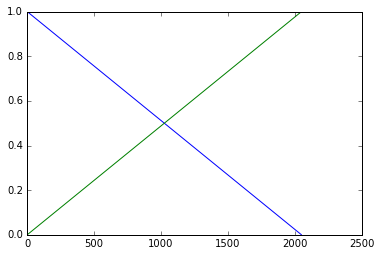

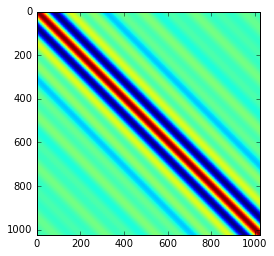

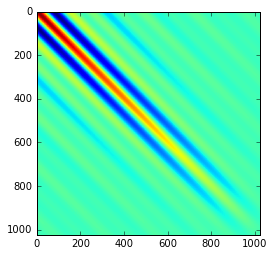

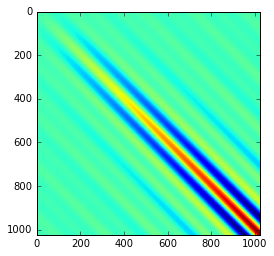

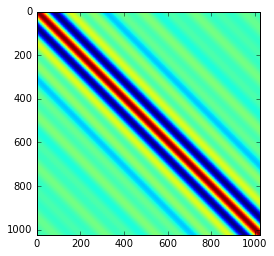

In [5]:
reload(qs)
Sp,wl,wh=D.getSp2()
D=qs.QuadShit()
print wl
plt.plot(wl)
plt.plot(wh)
Sp1,xil=D.getSponez()
for S in [Sp1[2], Sp[2], Sp[7],Sp[2]+Sp[7]]:
    plt.figure()
    plt.imshow(S,interpolation='nearest')

In [27]:
reload(qs)
D=qs.QuadShit()
SX=[np.dot(RT.T,np.dot(S,RT)) for S in Sp]
SY=D.getCutmatrices(SX,kpad=50,koff=500)

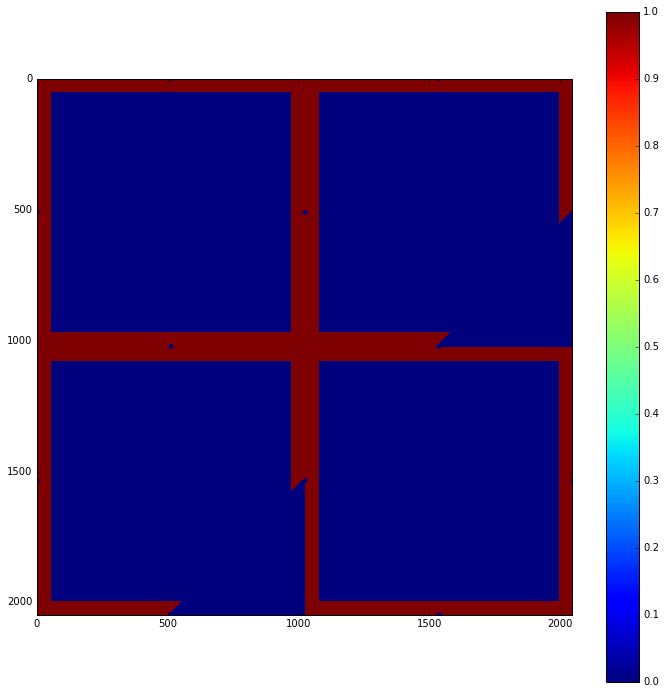

In [28]:
plt.figure(figsize=(12,12))
plt.imshow(SY[0]/SX[0],interpolation='nearest')
plt.colorbar()
#plt.savefig("V1.png")
#plt.figure(figsize=(12,12))
#plt.imshow(SY[0][:50,:50],interpolation='nearest')
#plt.colorbar()
#plt.savefig("V1cut.png")

In [8]:
D=qs.QuadShit()
cid=D.CI*D.genskew_masked()
Nb=len(Sp)
TFD=0.5*np.array([np.dot(np.dot(S,cid),cid) for S in Sp])
TSD=np.zeros((Nb,Nb))
CI=np.diag(D.CI)
for i in range(len(TFD)):
    for j in range(i,len(TFD)):
        TSD[i,j]=0.5*np.trace(np.dot(np.dot(CI,Sp[i]),np.dot(CI,Sp[j])))        
        TSD[j,i]=TSD[i,j]
TV=np.dot(la.inv(TSD),TFD)

In [30]:
lcid=np.dot(FW,cid)
N=D.N
for kpad in [10]:
    for dkoff in [50]:
        nSX=D.getCutmatrices(SX,kpad=kpad,koff=dkoff)
        FDL=0.5*np.array([np.dot(lcid,np.dot(SL.T,lcid)) for SL in SX])
        SDL=np.zeros((Nb,Nb))
        LCI=np.dot(np.diag(D.CI),FW.T)
        LCI=np.dot(FW,LCI)
        print LCI.shape,nSX[0].shape
        for i in range(len(FDL)):
            for j in range(i,len(FDL)):
                SDL[i,j]=0.5*np.trace(np.dot(np.dot(LCI,nSX[i]),np.dot(LCI,nSX[j])))        
                SDL[j,i]=SDL[i,j]

        print "----------------------"
        print "elements used:",kpad,dkoff
        print "ratios FD:",FDL/TFD
        print "rations SD diag:",SDL.diagonal()/TSD.diagonal()
        VL=np.dot(la.inv(SDL),FDL)
        print "ratios values:",VL/TV

(2048, 2048) (2048, 2048)
----------------------
elements used: 10 50
ratios FD: [ 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.]
rations SD diag: [ 0.99267301  0.98942621  0.98192058  0.96883662  0.99963824  0.99414649
  0.99065564  0.98301177  0.96991397  0.99967286]
ratios values: [ 1.12444245  1.0234226   1.02936203  1.05621143  1.00123142  1.01466213
  1.00940448  1.03172164  1.17380074  1.00041603]
